In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import sys
import os
sys.path.append(os.path.abspath("../src"))

from utils import (
    generate_predictions,
    evaluate_classification_results,
    load_image_paths_and_labels
)

## Load models

### Models from:

#### Model 1 
  - https://www.kaggle.com/code/mohamedgobara/96-1-in-retinal-oct-cnn-model
#### Model 2
  - https://www.kaggle.com/code/arbazkhan971/retina-damage-classification-95-accuracy/output


In [18]:
# Load model1 (full Keras model with architecture + weights)
model_path1 = "../models/Retinal_Model.h5"
model1 = load_model(model_path1, compile=False)

# Print summaries
print("Model 1 Summary:")
print(model1.summary())

Model 1 Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 21,124,268
Trainable para

In [19]:
# Load model1 (full Keras model with architecture + weights)
model_path2 = "../models/finetuned_model.h5"
model2 = load_model(model_path2, compile=False)

# Print summaries
print("Model 2 Summary:")
print(model2.summary())

Model 2 Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 37,

### Compile models
Recompile the tf models

In [20]:
model1.compile(optimizer=Adam(learning_rate=0.001),  # Use your desired optimizer
              loss='categorical_crossentropy',  # Use your loss function
              metrics=['accuracy'])  # Use your desired metrics
model2.compile(optimizer=Adam(learning_rate=0.001),  # Use your desired optimizer
              loss='categorical_crossentropy',  # Use your loss function
              metrics=['accuracy'])  # Use your desired metrics


## Usage

Get images from:

The first dataset is: [Large Dataset of Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images](https://data.mendeley.com/datasets/rscbjbr9sj/3) Kermany D, Goldbaum M, Cai W et al. Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. Cell. 2018; 172(5):1122-1131. doi:10.1016/j.cell.2018.02.010.



The seconda one is: [Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification](https://data.mendeley.com/datasets/rscbjbr9sj/2) Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.2.




In [ ]:
# Define test dataset folders
folder_path1 = "../data/ZhangLabData/CellData/OCT/test"
folder_path2 = "../data/OCT2017/OCT2017/test"
sample_data_folder_path = "../data/sample_data"

# Load image paths and labels using utility function
    # image_paths, true_labels = load_image_paths_and_labels([folder_path1, folder_path2])
image_paths, true_labels = load_image_paths_and_labels([folder_path1])
# image_paths, true_labels = load_image_paths_and_labels([sample_data_folder_path])

# Verification
print(f"Total images: {len(image_paths)}")
print(f"Sample labels: {set(true_labels)}")


Total images: 1000
Sample labels: {'NORMAL', 'CNV', 'DME', 'DRUSEN'}


## Test models

Classify images and save the results

#### Model 1 

In [22]:
y_true1, y_pred1, y_true_numeric1, y_pred_numeric1 = generate_predictions(image_paths, true_labels, model1, target_size=(299, 299))

Generating predictions: 100%|██████████| 1000/1000 [02:40<00:00,  6.22it/s]


#### Model 2

In [23]:
y_true2, y_pred2, y_true_numeric2, y_pred_numeric2 = generate_predictions(image_paths, true_labels, model2, target_size=(150, 150))

Generating predictions: 100%|██████████| 1000/1000 [01:34<00:00, 10.61it/s]


### Show test metrics

{
    "Total Images": 1000,
    "Accuracy": 0.973,
    "Precision": 0.9740174108047635,
    "Recall": 0.973,
    "F1 Score": 0.9729690267876736
}
Classification Report:
               precision    recall  f1-score   support

         CNV       0.93      0.99      0.96       250
         DME       0.98      1.00      0.99       250
      DRUSEN       0.98      0.92      0.95       250
      NORMAL       1.00      0.98      0.99       250

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000

Confusion Matrix:
 [[248   2   0   0]
 [  0 250   0   0]
 [ 19   0 231   0]
 [  0   2   4 244]]


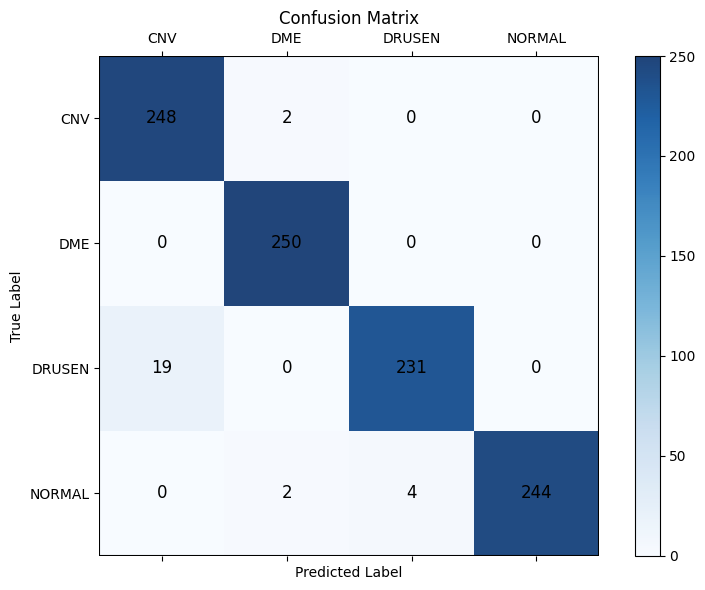

In [24]:
evaluate_classification_results(y_true_numeric1, y_pred_numeric1, "../results/preliminary/model1_evaluation")

{
    "Total Images": 1000,
    "Accuracy": 0.857,
    "Precision": 0.903143523966425,
    "Recall": 0.857,
    "F1 Score": 0.8580708693182764
}
Classification Report:
               precision    recall  f1-score   support

         CNV       0.65      1.00      0.79       250
         DME       1.00      0.94      0.97       250
      DRUSEN       0.99      0.60      0.75       250
      NORMAL       0.98      0.89      0.93       250

    accuracy                           0.86      1000
   macro avg       0.90      0.86      0.86      1000
weighted avg       0.90      0.86      0.86      1000

Confusion Matrix:
 [[250   0   0   0]
 [ 15 235   0   0]
 [ 96   0 150   4]
 [ 25   1   2 222]]


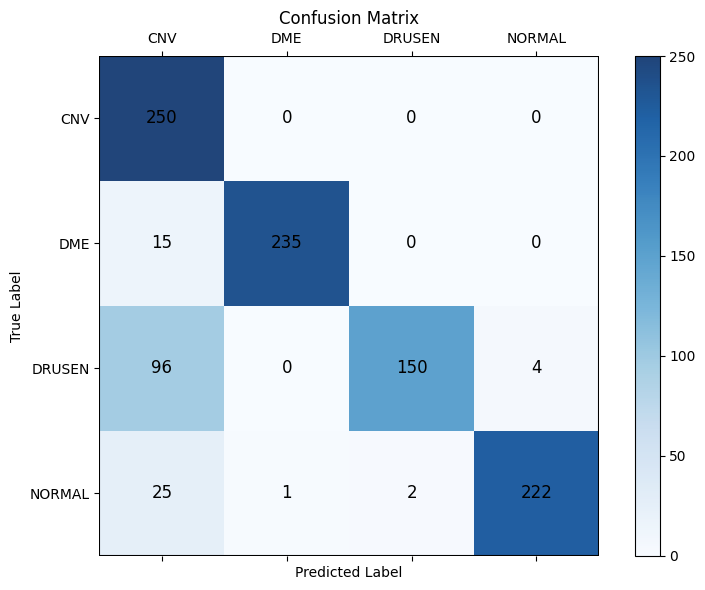

In [25]:
evaluate_classification_results(y_true_numeric2, y_pred_numeric2, "../results/preliminary/model2_evaluation")